# Tabelle

*(Sezione 6.7 del libro di testo, Argomenti avanzati 6.9)*

Supponiamo di voler memorizzare una *tabella* come
```text
2   3   4
1   0  -3
```
in un oggetto Python. Useremo il termine *matrice* come sinonimo di *tabella*.

## Possibili approcci

Abbiamo varie possibilità:

**1) usiamo una variabile diversa per ogni elemento della tabella**

Questa soluzione è pessima, va bene solo se sappiamo a priori quanti elementi ha la tabella, ma se la tabella va letta da un file su memoria di massa o da Internet, e può avere dimensione variabile, non è assoluamente possibile seguire questo approccio. Ad ogni modo, il codice che mette tutti i dati della tabella di sopra nelle variabili opportune e le somma sarebbe il seguente:
```python
a = 2
b = 3
c = 4
d = 1
e = 0
f = -3
a + b + c + d + e + f
```

**2) usare una variabile diversa per ogni riga: ogni variabile è una lista degli elementi di quella riga**

Un po' meglio di prima, ma non risolve veramente il problema, perché dobbiamo sapere a priori quante sono le righe della tabella (mentre siamo flessibili sulle colonne). L'esempio di sopra diventa:
```python
l1 = [2, 3, 4]
l2 = [1, 0, -3]

sum(l1) + sum(l2)
```
Questa soluzione è indipendente dal numero di colonne: se le liste `l1` ed `l2` hanno 100 elementi invece di 3, il codice della somma funziona correttamente. Se invece aumenta il numero di righe, il codice della somma va modificato per prevedere la riga in più che è stata inserita.

**3) usare una unica lista in cui inserire tutti gli elementi della tabella**

Questa soluzione non è male, ed è indipendente sia dal numero di righe che dal numero di colonne della tabella.
```python
t = [ 2, 3, 4, 1, 0, -3 ]

sum(t)
```

Il problema di questa soluzione è che è un po' scomoda per il programmatore. Infatti non è immediato capire come accedere ad un elemento che sta in una certa riga e colonna: bisogna fare dei calcoli per determinare dove sta questo elemento. I calcoli in realtà non sono particolarmente difficili: l'elemento in riga `i` colonna `j` sta nella posizione `i * num_colonne + j` della lista `l`. Ad ogni modo, normalmente si preferisce adottare la soluzione che vedremo qui sotto.

**4) utilizzare una unica lista di liste: gli elementi della lista sono le righe della tabella, ogni riga rappresentata essa stessa con una lista di numeri**

Questa è la soluzione più usata e quella che esploreremo nel resto della lezione. L'idea è fondamentalmente partire dalla soluzione 2, ma impacchettare tutte le liste che contengono le righe della tabella in una unica lista di liste.
```python
l1 = [2, 3, 4]
l2 = [1, 0, -3]
t = [l1, l2]
```
o anche, più semplicemente
```python
t = [ [2,3,4], [1,0,-3] ]
```
Per il programma che fa la somma dei numeri della tabella vedremo dopo.



## Rappresentazione di tabelle come liste di liste

Fin'ora abbiamo usato solo liste contententi numeri, stringhe o booleani. Ma una lista può contenere qualunque tipo di dato, in particolare può contenere altre stringhe, come:

In [1]:
[ 1, [2,3], 4, [] ]

[1, [2, 3], 4, []]

che contiene in seconda e in quarta posizione una lista. Questa possibilità viene usata sistematicamente nella rappresentazione di tabelle.

In [2]:
# Crea una lista formata da due elementi. Entrambi gli elementi sono a loro volta liste di numeri.
t = [ [2, 3, 4], [1, 0, -3] ]
t

[[2, 3, 4], [1, 0, -3]]

Per comodità, quando scriviamo una tabella in Python possiamo andare a capo dopo ogni riga per avere una visualizzazione più chiara.

In [3]:
t = [
    [2, 3, 4],
    [1, 0, -3]
]
t

[[2, 3, 4], [1, 0, -3]]

Notare che un tabella **non è** un nuovo tipo di dato, è sempre una lista! Il fatto che noi la usiamo per memorizzare una tabella è qualcosa di cui Python non è a conoscenza.

In [4]:
type(t)

list

Gli elementi della lista `t` corrispondono alle righe della tabella.

In [5]:
# Il primo elemento è la lista [2, 3, 4], ovvero la prima riga della tabella
t[0]

[2, 3, 4]

In [6]:
# Il secondo elemento è la lista [2, 3, 4], ovvero la prima riga della tabella
t[1]

[1, 0, -3]

Per accedere ad un singolo elemento della tabella bisogna prima selezionare la riga desiderata con un primo utilizzo dell'operatore di accesso alle liste (le parentesi quadre []), ed all'interno della riga selezionare la colonna desiderata con un secondo utilizzo dell'operatore di accesso alle liste. Ad esempio `t[0][1]` estrae la prima riga (perché `t[0]` = `[2, 3, 4]` è il primo elemento di `l`, quindi la prima riga) e poi su di esso applica l'operazione `[1]` che restituisce il secondo elemento di `[2, 3, 4]` ovvero il `3`. In sostanza, `t[0][1]` accede all'elemento di `t` in riga `0` e colonna `1` (come nel caso delle liste semplici, numero di riga e colonna iniziano da 0).

In [7]:
t[0][1]

3

Supponiamo ora di voler determinare il numero di *righe* della tabella `t`. Poiché ogni elemento di `t` è una riga, il numero di righe è esattamente `len(t)`.

In [8]:
# la tabella memorizzata in t ha due righe, e infatti len(t) = 2
len(t)

2

Ma come ottenere il numero di colonne della tabella ? Ognuno degli elementi di `t` (ad esempio `t[0]`) contiene una riga della tabella. Il numero di elementi in una riga è appunto il numero di colonne. Pertanto, il numero di colonne della tabella la si può calcolare come `len(t[0])`, il numero di elementi della prima riga. Ovviamente è possibile usare anche `len(t[1])`, `len(t[2])`, etc..., ma di solito si usa `len(t[0])` perché non siamo sicuri di quante righe abbia la tabella.

In [9]:
# la tabella memorizzata in l ha due colonne, e infatti len(l) = 3
len(t[0])

3

## Esempi: funzioni che restituiscono singoli valori

### Somma di una colonna

Supponiamo di voler scrivere una funzione `somma_colonna(t, j)` che determina la somma degli elementi in colonna j della tabella `t`.

In [10]:
def somma_colonna(t, j):
    totale = 0
    for i in range(len(t)): # vi ricordo che len(l) è il  numero di righe di t
        totale += t[i][j]
    return totale

Questo è un esempio di utilizzo:

In [11]:
print(t)
somma_colonna(t, 0)

[[2, 3, 4], [1, 0, -3]]


3

In alternativa, in vece di contare gli indici di riga con il `for`, si possono estrarre direttamente le righe dalla tabella t, ed accedere all'elemento i-esimo di ogni riga:

In [12]:
def somma_colonna2(t, j):
    totale = 0
    for riga in t:
        totale += riga[j]
    return totale

print(t)
somma_colonna2(t, 0)

[[2, 3, 4], [1, 0, -3]]


3

### Somma di una riga

Analogamente si può fare la somma della riga i-esima:

In [13]:
def somma_riga(t, i):
    totale = 0
    for j in range(len(t[0])):
        totale += t[i][j]
    return totale

print(t)
print(somma_riga(t,0))

[[2, 3, 4], [1, 0, -3]]
9


In realtà, questo problema si può risolvere in maniera molto più efficiente. Questo perché la riga i-esima è tutta memorizzata nella lista `t[i]`, quindi possiamo sommare facilmente i suoi elementi con la funzione predefinita `sum` (o con una delle varie funzioni che sommano gli elementi di una lista che abbiamo visto nelle lezioni precedenti). La versione semplificata è pertanto:

In [14]:
def somma_riga2(t, i):
    return sum(t[i])

print(somma_riga2(t,0))

9


In generale, operazioni su tabelle che operano una riga alla volta sono più semplici da implementare di operazioni che operano un colonna alla volta, proprio per il tipo di rappresentazione scelta.

### Somma di tutti gli elementi della tabella

Vediamo ora una funzione che fa la somma di tutti gli elementi della tabella.

In [15]:
def somma_tabella(t):
    totale = 0
    for i in range(len(t)):
        for j in range(len(t[0])):
            totale += t[i][j]
    return totale

print(t)
print(somma_tabella(t))

[[2, 3, 4], [1, 0, -3]]
7


Anche in questo caso si può sfruttare l'asimmetria nella rappresentazione tra righe e colonne in questo modo:

In [16]:
def somma_tabella2(t):
    totale = 0
    for i in range(len(t)):
        totale += sum(t[i])
    return totale

somma_tabella2(t)

7

O in maniera ancora più compatta, usando il `for` con estrazione diretta:

In [17]:
def somma_tabella3(t):
    totale = 0
    for riga in t:
        totale += sum(riga)
    return totale

somma_tabella3(t)

7

### Somma della diagonale principale

Infine, supponiamo di voler calcolare la somma degli elementi della diagonale di una tabella. Supponiamo per questo che la tabella sia *quadrata* (ovvero il numero di righe è uguale al numero di colonne). Gli elementi della diagonale di una tabella `t` sono `t[0][0]`, `t[1][1]`, `t[2][2]` e così via. Sono perciò caratterizzati dall'avere l'indice di riga uguale all'indice di colonna. Ci basta quindi un ciclo che scorre tutti gli indici da 0 al numero di righe - 1, e lo stesso indice lo usiamo per entrambe le *coordinate*.

In [18]:
def somma_diagonale(t):
    totale = 0
    for i in range(len(t)):
        totale += t[i][i]
    return totale

t_quadrata = [
    [ 1, 2, 3 ],
    [ 4, 5, 6 ],
    [ 7, 8, 9 ]
]
somma_diagonale(t_quadrata)

15

### Domanda degli studenti: somma della diagonale secondaria

Se vogliamo invece calcolare la somma degli elementi della diagonale secondaria, ci basta osservare che quest'ultimi sono caratterizzati dal fatto che se sommiamo indice di riga ($i$) ed indice di colonna ($j$), abbiamo $i + j = \text{numero righe} - 1$, e quindi $j = \text{numero righe} -1 - i$.

In [19]:
def somma_diagonale_secondaria(t):
    totale = 0
    for i in range(len(t)):
        totale += t[i][len(t)-i-1]  # possiamo usare -i-1 invece di len(t)-i-1 sfruttando gli indici negativi
    return totale

t_quadrata = [
    [ 1, 2, 3 ],
    [ 4, 5, 6 ],
    [ 7, 8, 9 ]
]
somma_diagonale_secondaria(t_quadrata)

15

## Funzioni che restituiscono liste

Iniziamo con una cosa relativamente semplice: una funzione `estrai_colonna(t, j)` che estrae la `j`-esima riga dalla tabella `t`. Ovvero, se
```python
t = [
    [1, 2, 3],
    [4, 5, 6]
]
```
vogliamo che `estrai_colonna(t,1)` restituisca `[2, 5]`.

La soluzione è molto simile a quella di `somma_colonna(t, j)` vista sopra. Mentre in `somma_colonna(t, j)` gli elementi che estraevamo dalla colonna `j` li sommavamo ad una variabile intera, qui si tratta di aggiungerli ad una lista.

In [20]:
def estrai_colonna(t, j):
    risultato = []
    for i in range(len(t)):
        risultato.append(t[i][j])
    return risultato

t = [
    [1, 2, 3],
    [4, 5, 6]
]
estrai_colonna(t,1)

[2, 5]

Ovviamente, sono possibili varianti. Ad esempio, come accade spesso quando si itera sulle righe, si può estrarre direttamente la riga invece di usare gli indici:

In [21]:
def estrai_colonna(t, j):
    risultato = []
    for riga in t:
        risultato.append(riga[j])
    return risultato

t = [
    [1, 2, 3],
    [4, 5, 6]
]
estrai_colonna(t,1)

[2, 5]

Notare che, per come è strutturata una tabella, l'analoga funzione `estrai_riga(t, i)` che estra la riga i-esima dalla tabella è del tutto banale:

In [22]:
def estrai_riga(t, i):
    return t[i]

Proviamo adesso una funzione `somma_tutte_righe(t)` che calcola la somma di tutte le righe della tabella `t`, e restituisce il risultato sotto forma di lista. Ovvero, se 
```python
t = [
    [1, 2, 3],
    [4, 5, 6]
]
```
vogliamo che `somma_tutte_righe(t)` restituisca `[6, 15]`.

Possiamo riusare la funzione `somma_riga(t, i)` che abbiamo scritto prima.

In [23]:
def somma_tutte_righe(t):
    risultato = []
    for i in range(len(t)):
        risultato.append(somma_riga(t, i))
    return risultato

t = [
    [1, 2, 3],
    [4, 5, 6]
]
somma_tutte_righe(t)

[6, 15]

Ovviamente possiamo anche rimpiazzare `somma_riga` con una delle sue implementazioni, ad esempio quella basata sulla funzione predefinita `sum`.

In [24]:
def somma_tutte_righe(t):
    risultato = []
    for i in range(len(t)):
        risultato.append(sum(t[i])) # abbiamo rimpiazzato somma_riga(t, i) con sum(t[i])
    return risultato

O anche con un for che estrae direttamente le righe della tabella.

In [25]:
def somma_tutte_righe(t):
    risultato = []
    for riga in t:
        risultato.append(sum(riga)) # abbiamo rimpiazzato somma_riga(t, i) con sum(t[i])
    return risultato

Analogamente possiamo fare per il caso della somma di tutte le colonne.

In [26]:
def somma_tutte_colonne(t):
    risultato = []
    for j in range(len(t[0])):
        risultato.append(somma_colonna(t, j))
    return risultato

somma_tutte_colonne(t)

[5, 7, 9]

Anche qui possiamo rimpiazzare `somma_colonna` con la sua implementazione, ma è un po' più difficile di prima perché `somma_colonna` non ha una implementazione semplice.

In [27]:
def somma_tutte_colonne(t):
    risultato = []
    for j in range(len(t[0])):
        totale = 0
        for i in range(len(t)):
            totale += t[i][j]
        risultato.append(totale)
    return risultato

somma_tutte_colonne(t)

[5, 7, 9]

## Funzioni che restituiscono tabelle e problemi di aliasing

### Creare una tabella riempita con una valore fissato

Cominciamo con un problema in apparenza semplice, ma che ci procurerà qualche grattacapo. Supponiamo di voler scrivere una funzione `crea_tabella(num_righe, num_colonne, v)` che crea una tabella di `num_righe` righe, `num_colonne` colonne, riempita con il valore `v`. Ad esempio:
```python
crea_tabella(2, 3, 1)
```
deve restituire
```python
[
    [1, 1, 1],
    [1, 1, 1]
]
```

Un primo tentativo potrebbe essere:

In [28]:
# NON È CORRETTA
def crea_tabella(num_righe, num_colonne, v):
    # creiamo una riga della tabella, una lista di v lunga num_colonne
    riga = [v] * num_colonne
    # partiamo da una tabella inizialmente vuota
    tabella = []
    for _ in range(num_righe):
        # e aggiungiamo alla tabella una nuova riga alla volta
        tabella.append(riga)
    return tabella

Vediamola in funzione:

In [29]:
t = crea_tabella(2, 3, 1)
t

[[1, 1, 1], [1, 1, 1]]

Sembra funzionare, ma ora supponiamo di modificare un elemento.

In [30]:
t[1][1] = 2
t

[[1, 2, 1], [1, 2, 1]]

**La modifica si ripercuote su tutte le righe!** Le righe della tabella sono in realtà tutte alias dell'unica riga che è stata creata. Questa infatti è la situazione di heap e stack dopo l'esecuzione di
```python
t = crea_tabella(2, 3, 1)
```
Il grafico mostra anche il recordi di attivatzine della funzione `crea_tabella`, anche se in realtà viene cancellato non appena si esce dalla funzione.

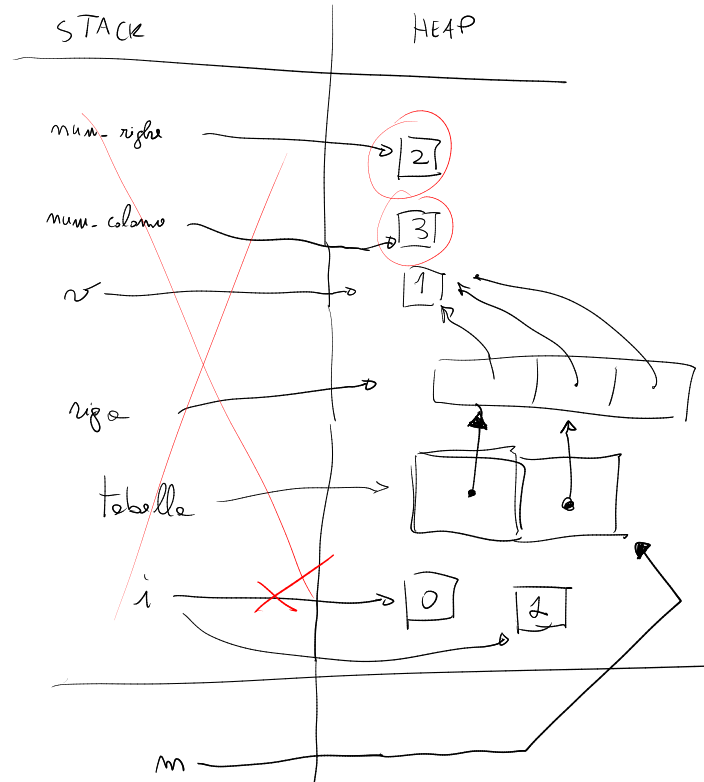



Dobbiamo allora procedere come segue, usando `riga[:]` per creare una copia della riga di partenza.

In [31]:
def crea_tabella(num_righe, num_colonne, v):
    riga = [v] * num_colonne
    # partiamo da una tabella inizialmente vuota
    tabella = []
    for _ in range(num_righe):
        # e aggiungiamo alla tabella una nuova riga alla volta
        tabella.append(riga[:])
    return tabella

t = crea_tabella(2, 3, 0)
t[1][1] = 2
t

[[0, 0, 0], [0, 2, 0]]

Oppure anche così, creando una riga ex-novo ogni volta.

In [32]:
def crea_tabella(num_righe, num_colonne, v):
    # partiamo da una tabella inizialmente vuota
    tabella = []
    for _ in range(num_righe):
        # e aggiungiamo alla tabella una nuova riga alla volta
        riga = [v] * num_colonne
        tabella.append(riga)
    return tabella

t = crea_tabella(2, 3, 0)
t[1][1] = 2
t

[[0, 0, 0], [0, 2, 0]]

L'esecuzione passo passo del blocco precedente è il seguente:

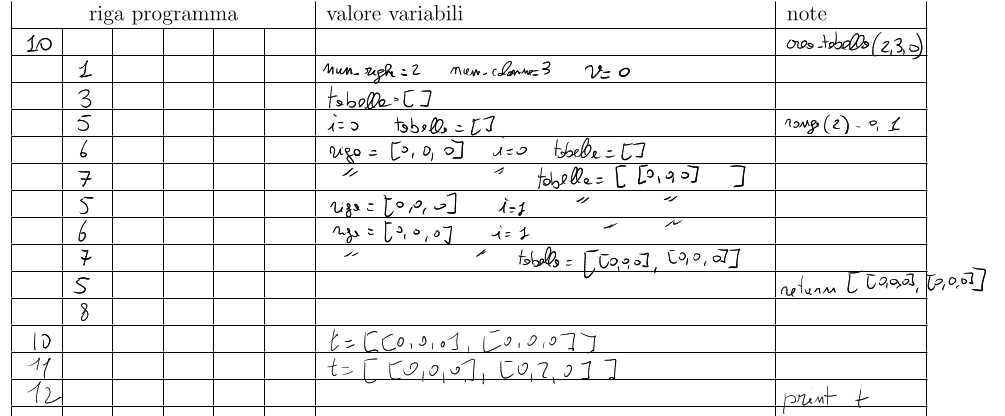

### Copiare una tabella

Data una tabella `t`, vogliamo copiare il valore di `t` in una nuova variabile `t2`, **in modo tale che `t` e `t2` siano due matrici diverse**. Sappiamo già che `t2 = t` non funziona perché crea un alias.

In [33]:
t = [
    [1, 2, 3],
    [4, 5, 6]
]
t2 = t
t2[0][0] = 99
t    # anche t viene modificata!!

[[99, 2, 3], [4, 5, 6]]

Ma neanche i metodi che abbiamo visto per le liste funzionano.

In [34]:
t = [
    [1, 2, 3],
    [4, 5, 6]
]
t2 = t[:]
# t2 = t.copy()
# t2 = list(t)
t2[0][0] = 99
t   # anche t viene modificata!!

[[99, 2, 3], [4, 5, 6]]

Questo perché tutti questi tre metodi effettuano quella che si chiama **copia superficiale** (o **shallow copy**) della lista `t`. Noi invece dobbiamo fare una **copia profonda** (o **deep copy**). In particolare, se do la seguente sequenza di istruzioni:
```python
t = [
    [1, 2, 3],
    [4, 5, 6]
]
t2 = t
t3 = t[:]  # o equivalente
```
la situazione in memoria è questa:

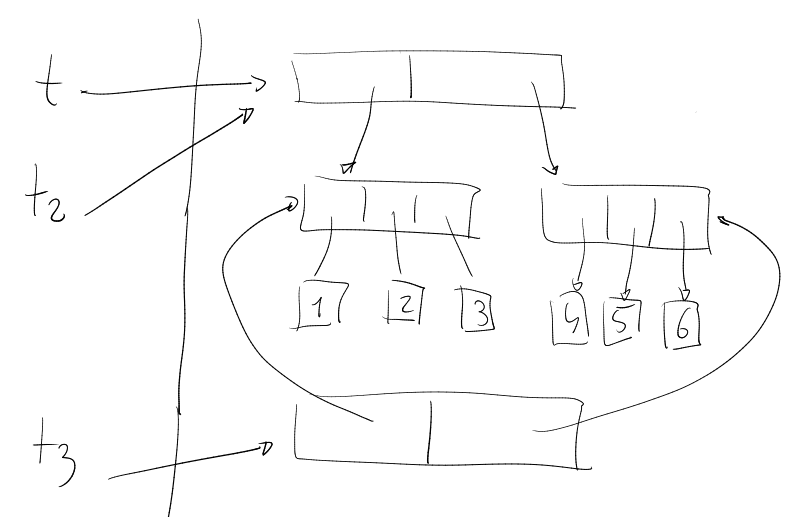



Notare che `t2` è proprio un alias di `t`, qualunque modifica su `t2` si ripercuote su `t`. Invece,  `t3` è effettivamente una nuova lista, ma le cui righe coincidono con quelle di `t`. Questo vuol dire che, se modifico le righe di `t3`, la modifica si ripercuote su `t`. Ma se faccio una operazione diversa, ad esempio
```python
t3.append([0, 0, 0])
```
la modifica non si ripercuote su `t`.

Se vogiamo creare una lista `t3` completamente separata da `t2`, possiamo procedere come segue:

In [35]:
def copia_tabella(t):
    # parto da una tabella vuota, senza nessuna riga
    nuova_tabella = []
    for riga in t:
        # e ad una ad una aggiungo le righe della tabella t, facendone una copia
        nuova_tabella.append(riga[:])
    return nuova_tabella

Notare che è importante nella istruzione `append` scrivere `riga[:]`. Se si utiliza solo `append(riga)`, la funzione non è corretta, perché le righe della tabella risultato sarebbero solo degli alias delle righe della tabella `t`. Otterremmo insomma un risultato del tutto analogo a `t.copy()`.

In [36]:
t = [
    [1, 2, 3],
    [4, 5, 6]
]
t2 = copia_tabella(t)
t2[0][0] = 99
t

[[1, 2, 3], [4, 5, 6]]

In alternativa, il modulo `copy` della libreria standard di python ha una funzione `deepcopy` che effettua la copia profonda di una tabella.

In [37]:
import copy
t = [
    [1, 2, 3],
    [4, 5, 6]
]
t2 = copy.deepcopy(t)
t2[0][0] = 99
t

[[1, 2, 3], [4, 5, 6]]

### Moltiplicare una tabella per un numero

Consideriamo adesso una funzione `moltiplica_tabella(m, v)` che prende come argomento una tabella `t` ed un valore `v`, e restituisce una nuova tabella ottenuta moltiplicando tutti gli elementi per `v`. Ad esempio, se
```python
t = [
    [ 1, 2, 3 ],
    [ 4, 5, 6 ]
]
```
la funzione `moltiplica_tabella(t, 2)` restituirà
```python
[ 
    [2, 4, 6],
    [8, 10, 12]
]
```

La cosa più semplice da fare è creare la tabella risultato con il numero di righe e colonne corretti, e riempirla successivamente.

In [38]:
def moltiplica_tabella(t, v):
    res = crea_tabella(len(t), len(t[0]), v)
    for i in range(len(t)):
        for j in range(len(t[0])):
            res[i][j] = t[i][j] * v
    return res

t = [
    [ 1, 2, 3 ],
    [ 4, 5, 6 ]
]
moltiplica_tabella(t, 2)


[[2, 4, 6], [8, 10, 12]]

### Sommmare due tabelle elemento per elemento

Consideriamo adesso una funzione `somma_tabelle(t1, t2)` che prende due tabelle come argomenti (con stesso numero di righe e colonne) e restituisce una nuova tabella (sempre stesso numero di righe e colonne) ottenuta sommando gli elementi delle due tabelle tra di loro. Ad esempio, se
```python
t1 = [
  [ 1, 2, 3 ],
  [ 4, 5, 6 ]
]
```
e
```python
t2 = [
  [ 0, 1, -1 ],
  [ 2, 3, 0 ]
]
```
la funzione `somma_tabelle(t1, t2)` restituirà
```python
[
  [ 1, 3, 2 ],
  [ 6, 8, 6 ]
]
```

La cosa più semplice da fare è creare la tabella risultato con il numero di righe e colonne corretti, e riempirla successivamente.

In [39]:
def somma_tabelle(t1, t2):
    t = crea_tabella(len(t1), len(t1[0]), 0)
    for i in range(len(t1)):
        for j in range(len(t1[0])):
            t[i][j] = t1[i][j] + t2[i][j]
    return t

t1 = [
  [ 1, 2, 3 ],
  [ 4, 5, 6 ]
]
t2 = [
  [ 0, 1, -1 ],
  [ 2, 3, 0 ]
]
somma_tabelle(t1, t2)

[[1, 3, 2], [6, 8, 6]]

## Funzioni che operano sul posto

Sono in genere più semplici delle omologhe che restituiscono una nuova tabella. Vediamo qui la versione *sul posto* della `moltiplica_tabella`. Se
```python
t = [
    [ 1, 2, 3 ],
    [ 4, 5, 6 ]
]
```
la funzione `moltiplica_tabella_sulposto(t, 2)`  non restituirà nulla, ma il valore di `t` cambierà in 
```python
[ 
    [2, 4, 6],
    [8, 10, 12]
]
```

In [40]:
def moltiplica_tabella_sulposto(t, v):
    for i in range(len(t)):
        for j in range(len(t[0])):
            t[i][j] *= v
    return t

t = [
    [ 1, 2, 3 ],
    [ 4, 5, 6 ]
]
moltiplica_tabella_sulposto(t, 2)
t

[[2, 4, 6], [8, 10, 12]]

Vediamo adesso la versione *sul posto* della `somma_tabelle`. Se
```python
t1 = [
  [ 1, 2, 3 ],
  [ 4, 5, 6 ]
]
```
e
```python
t2 = [
  [ 0, 1, -1 ],
  [ 2, 3, 0 ]
]
```
la funzione `somma_tabelle_sulposto(t1, t2)` non restiturà nulla, ma modificherà la lista `t1` in modo che il suo valore sia il seguente:
```python
[
  [ 1, 3, 2 ],
  [ 6, 8, 6 ]
]
```


In [41]:
def somma_tabelle_sulposto(t1, t2):
    for i in range(len(t1)):
        for j in range(len(t1[0])):
            t1[i][j] += t2[i][j]

t1 = [
  [ 1, 2, 3 ],
  [ 4, 5, 6 ]
]
t2 = [
  [ 0, 1, -1 ],
  [ 2, 3, 0 ]
]
somma_tabelle_sulposto(t1, t2)
t1

[[1, 3, 2], [6, 8, 6]]

## Rappresentazioni per righe o per colonne

In tutti gli esempi visti fin'ora, abbiamo deciso di rappresentare le tabelle *per riga*: gli elementi di una riga stavano sempre insieme tra di loro. Ma sarebbe altrettanto ragionevole memorizzare la tabella *per colonne*. Riconsideriamo quindi la tabella dell'esempio di sopra, e vediamo come sarebbe utilizzare la rappresentazione per colonne.
<pre>
2   3   4
1   0  -3
</pre>

**1) una variabile per ogni elemento**

Non cambia nulla, questa rappresentazione non si può definire né per righe né per colonne

**2) una variabile per ogni riga**

Diventa **una variabile per ogni colonna**. Invece di
```python
l1 = [2, 3, 4]
l2 = [1, 0, -3]
```
abbiamo
```python
c1 = [2, 1]
c2 = [3, 0]
c3 = [4, -3]
```

**3) una unica lista per tutti gli elementi**

Cambia l'ordine degli elementi, non più una riga dopo l'altra ma una colonna dopo l'altra. Invece di
```python
t = [2, 3, 4, 1, 0, -3]
```
abbiamo
```python
t = [2, 1, 3, 0, 4, -3]
```

**4) lista di liste**

Gli elementi della lista principale contengono le colonne della tabella. Invece di:
```python
t = [ [2,3,4], [1,0,-3] ]
```
abbiamo
```python
t = [ [2, 1], [3, 0], [4, -3] ]
```

Notare che l'interprete Python non sa niente di come decidete di memorizzare voi le tabelle: per lui si tratta solo di liste, cosa metterci dentro è compito del programmatore. Se scegliete di passare da una memorizzazione per righe ad una per colonne, dovrete sicuramente modificare buona parte del programma. Ad esempio, se utilizziamo il metodo 4 della lista di liste per memorizzare una tabella nella lista `t` adottando la appresentazione per righe e  volete accedere all'elemento nella riga 0 colonna 1, l'espressione corretta è `t[0][1]`, ma se usate la rappresentazione per colonne dovete invece scrivere `t[1][0]`.

In [ ]:
# rappresenta la solita tabella per righe ed estrae l'elemento nella riga 0 e colonna 1
t_per_righe = [ [2, 3, 4], [1, 0, -3]]
t_per_righe[0][1]

In [ ]:
# rappresenta la solita tabella per colonne ed estrae l'elemento nella riga 0 e colonna 1
t_per_colonne = [ [2,1], [3,0], [4,3] ]
t_per_colonne[1][0]

## Tabelle frastagliate (o seghettate)

Usando la *rappresentazione per righe*, è possibile rappresentare facilmente tabelle in cui il numero di colonne è diverso per ogni riga. Supponiamo infatti di voler memorizzare i voti che hanno preso alcuni studenti durante la loro carriera accademica. È ovvio che studenti diversi possono aver superato un numero di esami diverso, per cui la tabella in questione potrebbe essere qualcosa di simile a questa:
```text
Studente A: 28 29
Studente B: 20 22 18 27 23
Studente C:
```
È possibile rappresentare questi voti nel seguente modo:

In [42]:
t_frastagliata = [
    [28, 29],
    [20, 22, 18, 27, 23],
    []
]

Tabelle di questo tipo si chiamato taballe frastagliate o seghettate, in inglese *jagged array*. Ovviamente in un tabella di questo tipo, il fatto che esista l'elemento nella riga i colonna j, non ci assicura che esista l'elemento in colonna j per una riga diversa. Ad esempio:

In [43]:
t_frastagliata[1][3]

27

In [44]:
t_frastagliata[0][3]

IndexError: list index out of range

### Esempio: somma degli elementi di una tabella frastagliata

Per operare sulle tabelle frastagliate, perciò, occorre un po' di accortezza. Consideriamo la funzione vista sopra per calcolare la somma di tutti i numeri di una tabella:

In [45]:
def somma_tabella(t):
    totale = 0
    for i in range(len(t)):
        for j in range(len(t[0])):
            totale += t[i][j]
    return totale

Se noi proviamo ad eseguire `somma_tabella` su `t_frastagliata` otteniamo un errore, perché il numero di colonne è preso uguale al numero di elementi della prima riga della tabella (ovvero 2), ma la terza riga non ha due elementi (anzi, non ne ha proprio nessuno).

In [46]:
somma_tabella(t_frastagliata)

IndexError: list index out of range

Per poter lavorare sulle tabella frastagliate dobbiamo stare attenti: quando lavoriamo sulla riga i-esima dobbiamo considerare la lunghezza proprio di quella riga, perché tutte le righe hanno lunghezza diversa. Fortunatamente, è facile modificare `somma_tabella` per farla funzionare su tabelle frastagliate: basta rimpiazzare `len(t[0])`, che determina la lunghezza della prima riga, con `len(t[i])` che restituisce la lunghezza della riga corrente.

In [47]:
def somma_tabella_frastagliata(t):
    """
    Se l è una tabella restituisce la somma di tutti i numeri in essa presenti.
    """
    totale = 0
    for i in range(len(t)):
        # uso len(l[i]) in modo che considero il numero di colonne corrette per la riga i
        for j in range(len(t[i])):
            totale += t[i][j]
    return totale

La nuova versione funziona correttamente sia con `t` che con `t_frastagliata`.

In [48]:
somma_tabella_frastagliata(t)

42

In [49]:
somma_tabella_frastagliata(t_frastagliata)

167

Notare che le altre implementazioni di `somma_tabella` (ovvero `somma_tabella_2` e `somma_tabella_3`) funzionano già correttamente con le liste frastagliate.

In [50]:
somma_tabella2(t_frastagliata)

167

In [51]:
somma_tabella3(t_frastagliata)

167

### Esempio: moltiplicare sul posto una tabella frastagliata

Come nell'esempio precedente, vogliamo semplicemente estendere la funzione `moltiplica_tabella_sulposto(t,v)` al caso in cui la tabella `t` è frastagiata. È sufficiente, come prima, rimpiazzare `len(t[0])` con `len(t[i])`.

In [54]:
def moltiplica_tabella_frastagliata_sulposto(t, v):
    for i in range(len(t)):
        for j in range(len(t[i])):
            t[i][j] *= v
    return t

t = [
    [ 1, 2, 3 ],
    [ 4, 5 ]
]
moltiplica_tabella_frastagliata_sulposto(t, 2)
t

[[2, 4, 6], [8, 10]]

### Esempio: moltiplicare una tabella frastagliata per un numero

In questo caso, non possiamo fare come fatto precedentemente, ovvero creare una tabella della dimensione corretta con la funzione `crea_tabella` e poi modificare i valori, perchè ogni riga può avere lunghezza diversa. Possiamo allora procedere in due modi:
  1. copiare la tabella fornita come parametro in una nuova tabella con gli stessi valori (usando la funzione `copia_tabella` o altro metodo alternativo), e poi modificare la tabella appena creata usando la versione *sul posto* che abbia già visto di sopra;
  2. fare tutto in una volta, creando la tabella risultato mentre la si riempie col valore corretto, un po' sulla falsa riga della funzione `copia_tabella`.

Questa è la prima soluzione, che sfrutta le funzione `copia_tabella` e `moltiplica_tabella_frastagliata_sulposto`.

In [61]:
def moltiplica_tabella_frastagliata(t, v):
    risultato = copia_tabella(t)
    moltiplica_tabella_frastagliata_sulposto(risultato, v)
    return risultato

t = [
    [ 1, 2, 3 ],
    [ 4, 5 ]
]
moltiplica_tabella_frastagliata(t, 2)


[[2, 4, 6], [8, 10]]

Quella che segue è la seconda soluzione.

In [62]:
def moltiplica_tabella_frastagliata2(t, v):
    # Parto da una tabella vuota
    risultato = []
    # Scandisco le righe di t
    for riga in t:
        # Per ogni riga di t, credo una nuova lista che conterrà il risultato della moltiplicazione di t per v
        riga_risultato = []
        # Scandisco gli elementi della riga corrente
        for x in riga:
            # Ognuno di questi li moltiplico per v e li aggiungo alla nuova riga in costruzione
            riga_risultato.append(x * v)
        # Una volta finito di costruire la riga, la aggiunto alla tabella risultato
        risultato.append(riga_risultato)
    return risultato

t = [
    [ 1, 2, 3 ],
    [ 4, 5 ]
]
moltiplica_tabella_frastagliata2(t, 2)


[[2, 4, 6], [8, 10]]